In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

LOADING DATA SET

In [2]:
data = pd.read_csv('F:\DataMining\dataset\housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


DATA EXPLORATION

In [6]:
#define x and y to make a train_test_split data:
x = data.drop(['median_house_value'], axis= 1)
y = data['median_house_value']

In [7]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [9]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY


In [10]:
train_data = x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


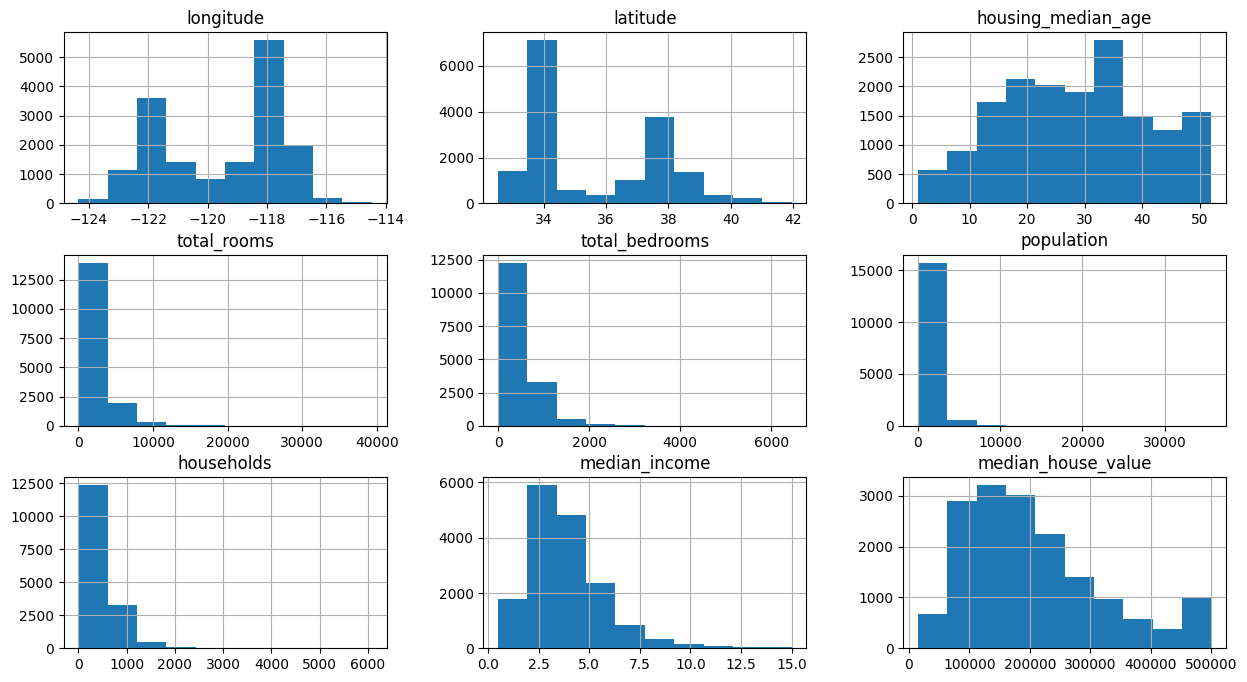

In [12]:
train_data.hist(figsize = (15,8));

In [13]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


<Axes: >

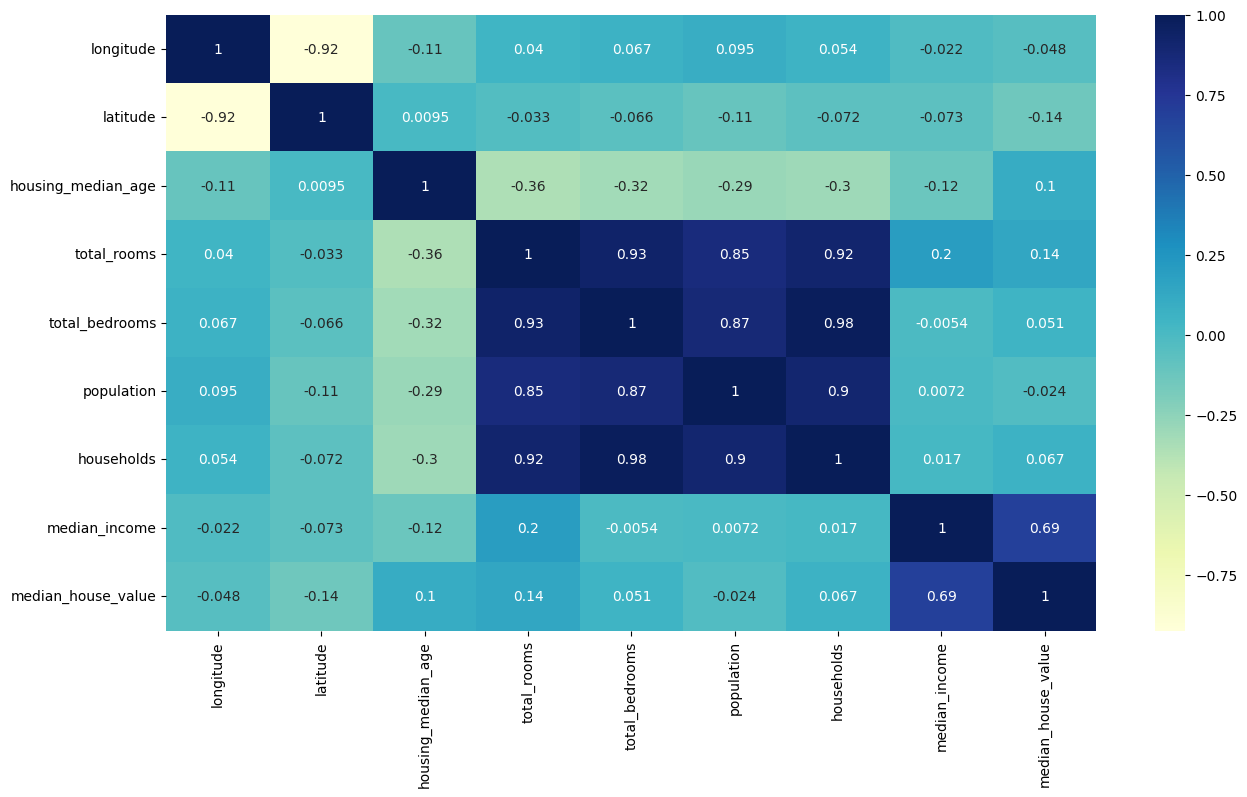

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot= True, cmap = "YlGnBu")

In [15]:
train_data.iloc[:, 3:7] = np.log1p(train_data.iloc[:, 3:7])

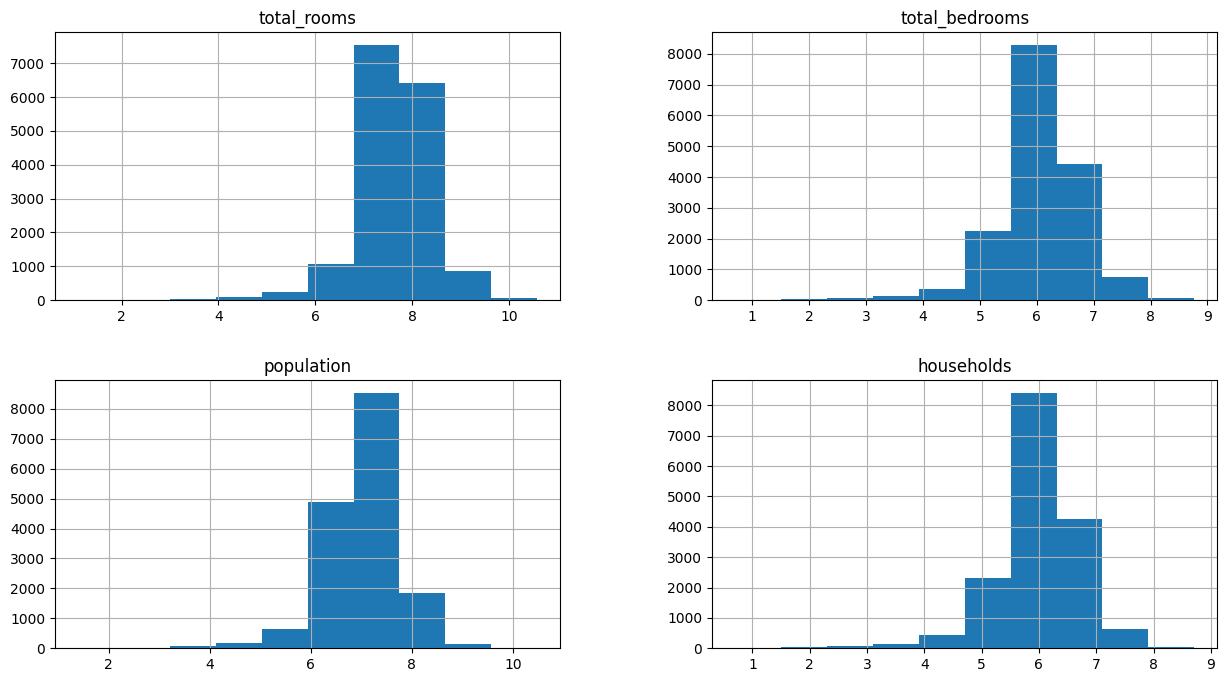

In [16]:
train_data.iloc[:, 3:7].hist(figsize = (15,8));

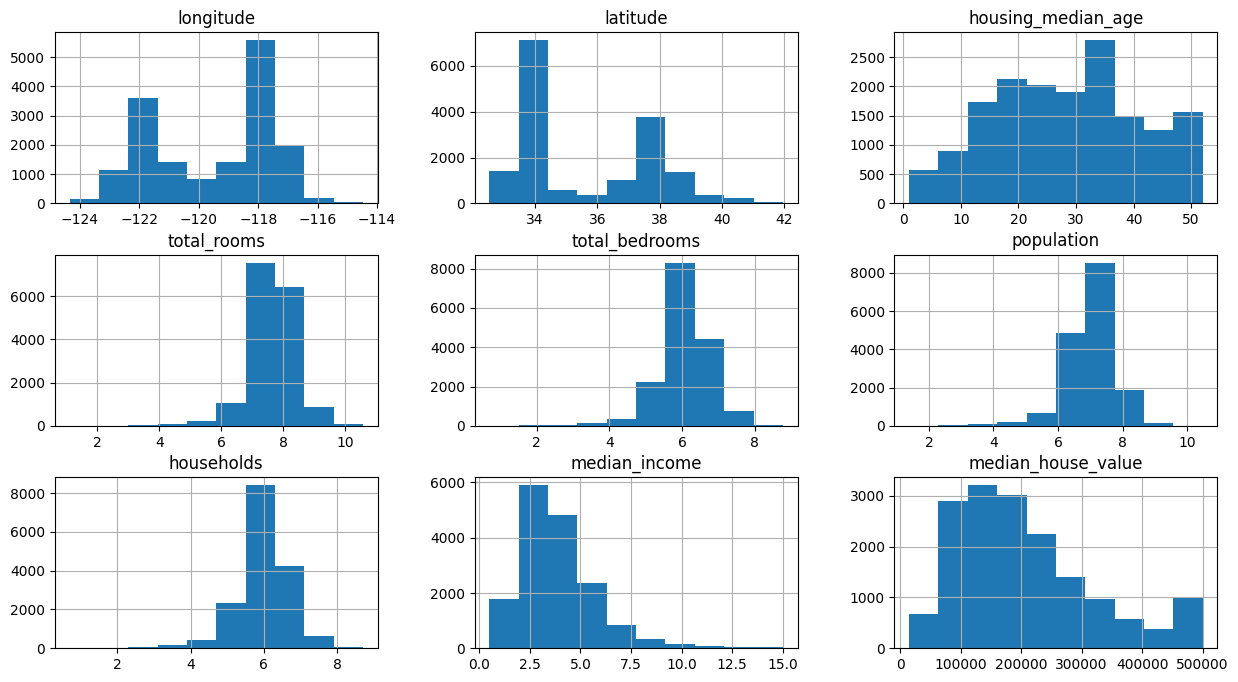

In [17]:
train_data.hist(figsize = (15,8));

In [18]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [19]:
pd.get_dummies(train_data.ocean_proximity, dtype= int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,1,0,0,0,0
2057,0,1,0,0,0
6453,0,1,0,0,0
4619,1,0,0,0,0
15266,0,0,0,0,1
...,...,...,...,...,...
11397,1,0,0,0,0
12081,1,0,0,0,0
5447,1,0,0,0,0
866,0,0,0,1,0


In [20]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype= int)).drop(['ocean_proximity'], axis= 1)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


<Axes: >

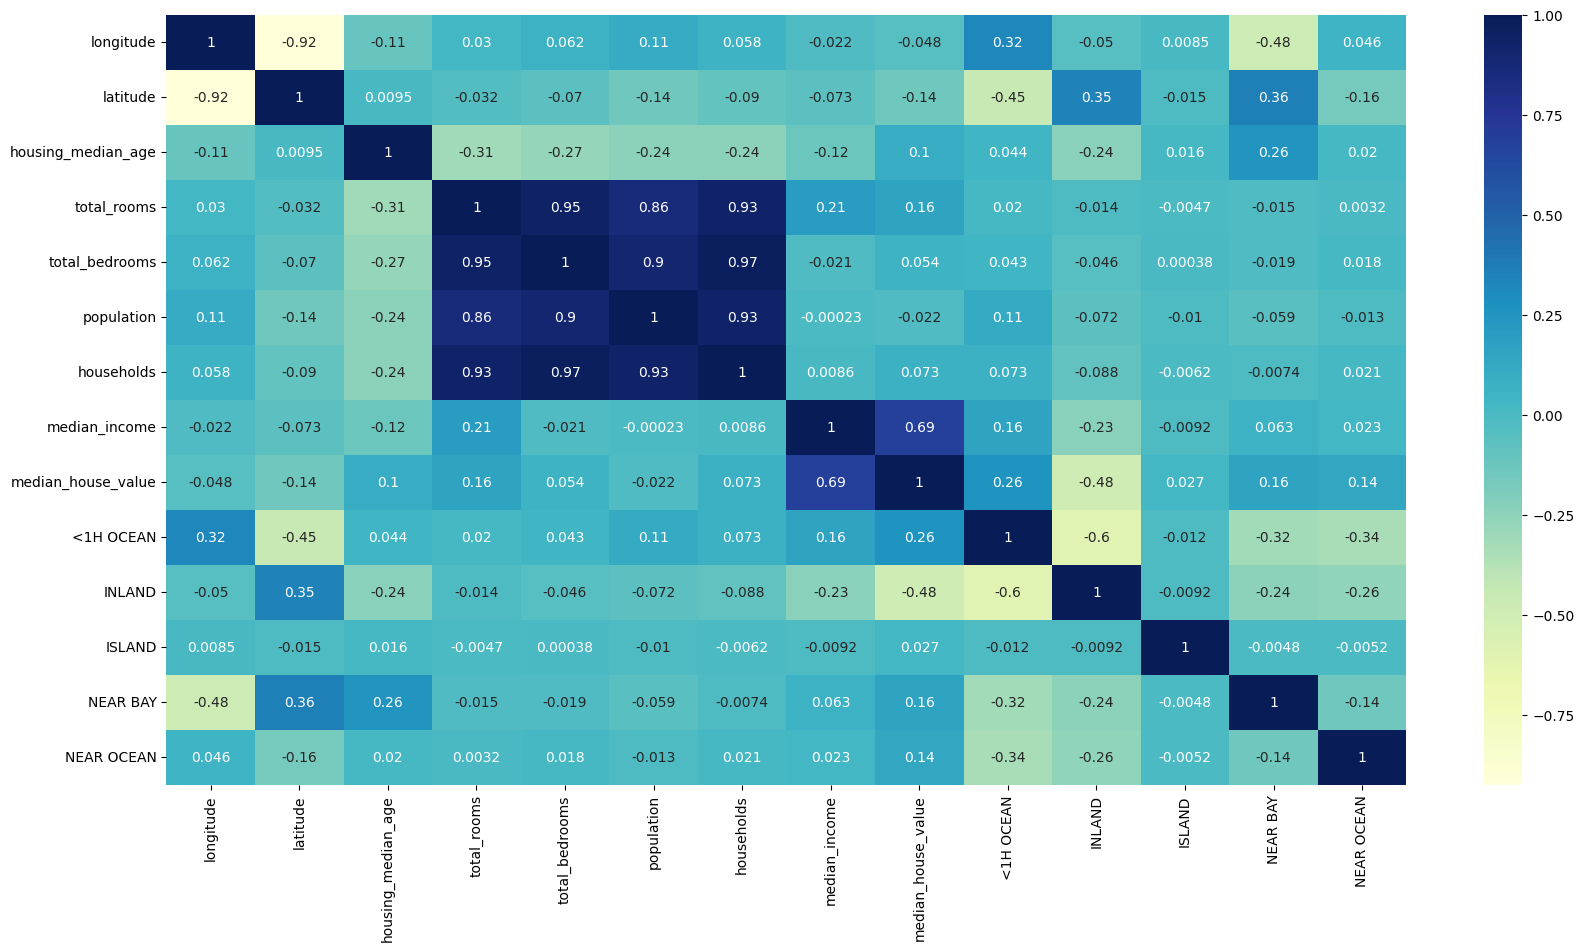

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(numeric_only=True), annot= True, cmap = "YlGnBu")

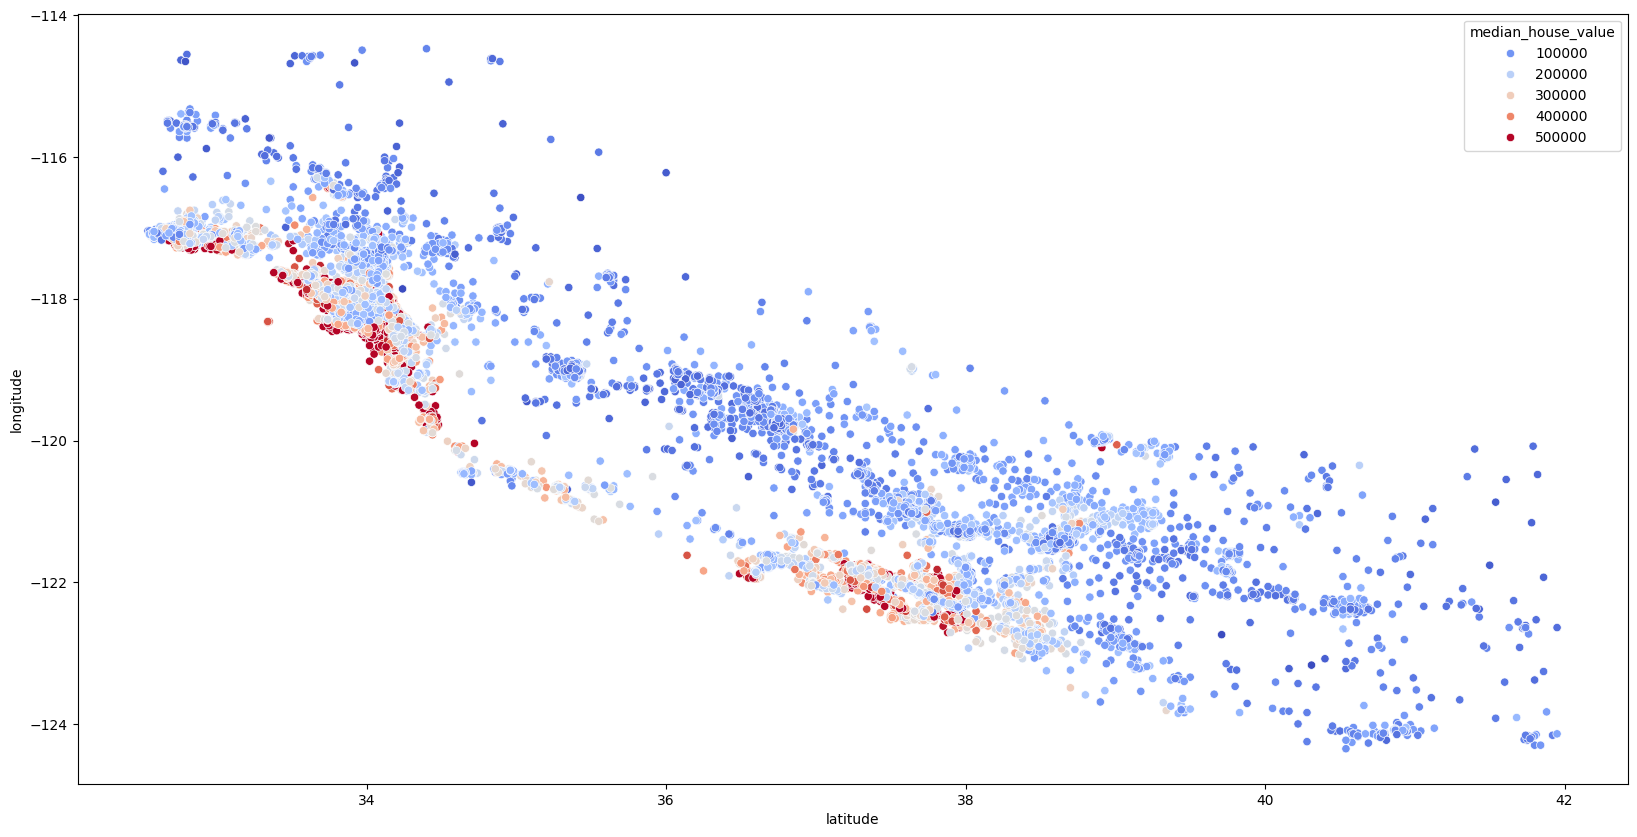

In [23]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm');

In [24]:
from sklearn.linear_model import LinearRegression

x_train = train_data.drop(['median_house_value'], axis= 1)
y_train = train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [25]:
test_data = x_test.join(y_test)

In [26]:
test_data.iloc[:, 3:7] = np.log1p(test_data.iloc[:, 3:7])

test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype= int)).drop(['ocean_proximity'], axis= 1)
x_test = test_data.drop(['median_house_value'], axis= 1)
y_test = test_data['median_house_value']

In [27]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,245800.0,0,0,0,0,1
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,137900.0,0,1,0,0,0
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,218200.0,1,0,0,0,0
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,220800.0,0,0,0,1,0
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,170500.0,0,1,0,0,0


In [28]:
reg.score(x_test, y_test)

0.6683603521371759